In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Reshape data

In [6]:
#in ANN we flattened the data
#in CNN in need 3D data i.e. h * w * (no. of channels)
#so we reshape our data
#(60000, 28, 28, 1) here 1 = no. of channels
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [7]:
X_train_n = X_train_full/255
X_test_n = X_test/255

In [8]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
#here we have 1 convolution layer only
#pooling has only 1 layer always
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model1.add(keras.layers.MaxPooling2D((2,2)))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(300,activation = 'relu'))
model1.add(keras.layers.Dense(100,activation = 'relu'))
model1.add(keras.layers.Dense(10,activation = 'softmax'))

In [13]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [14]:
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [15]:
model_history = model1.fit(X_train,y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7094 - accuracy: 0.7481 - val_loss: 0.5618 - val_accuracy: 0.7988
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4693 - accuracy: 0.8292 - val_loss: 0.4028 - val_accuracy: 0.8618
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4110 - accuracy: 0.8520 - val_loss: 0.6045 - val_accuracy: 0.7696
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3742 - accuracy: 0.8649 - val_loss: 0.3459 - val_accuracy: 0.8804
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3470 - accuracy: 0.8743 - val_loss: 0.3340 - val_accuracy: 0.8808
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3231 - accuracy: 0.8823 - val_loss: 0.3180 - val_accuracy: 0.8900
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3059 - accuracy: 0.8901 - val_loss: 0.3221 - val_accuracy:

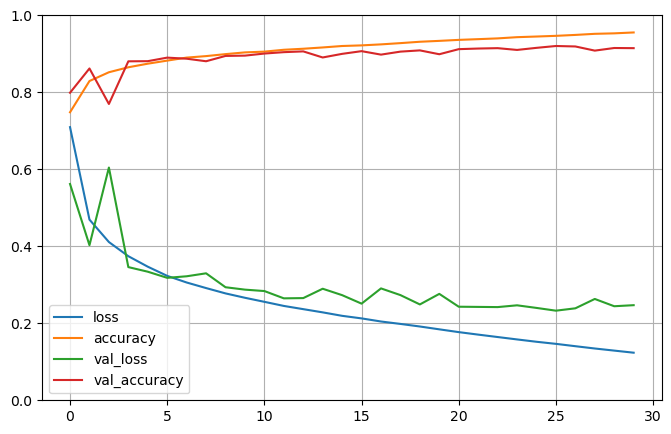

In [16]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.9104


[0.25883057713508606, 0.9103999733924866]

In [18]:
X_new = X_test[:3]

In [20]:
y_proba = model1.predict(X_new)
y_proba

1/1 [==============================] - 0s 47ms/step


array([[5.13245095e-06, 4.94967871e-08, 5.59841567e-07, 5.71221051e-07,
        3.03671641e-07, 4.09544125e-04, 3.71601033e-07, 1.02307310e-03,
        5.12184342e-05, 9.98509228e-01],
       [1.09648063e-05, 6.27445873e-11, 9.99946952e-01, 1.18685017e-08,
        3.49404545e-05, 1.83362631e-10, 7.20855496e-06, 1.20498324e-13,
        1.05925185e-10, 2.60451695e-11],
       [1.52606106e-07, 9.99997377e-01, 3.15390547e-10, 2.11240808e-06,
        3.00143085e-07, 3.60219604e-10, 6.66216682e-09, 5.47803226e-11,
        1.79643019e-11, 7.39816194e-11]], dtype=float32)

In [21]:
y_pred = np.argmax(model1.predict(X_new),axis = 1)
y_pred

1/1 [==============================] - 0s 9ms/step


array([9, 2, 1])

# Model on same data without pooling

In [22]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(300,activation = 'relu'))
model2.add(keras.layers.Dense(100,activation = 'relu'))
model2.add(keras.layers.Dense(10,activation = 'softmax'))

In [23]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [24]:
model2.summary()
#almost 4 times the no. of papameters than model 1

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               6489900   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6521330 (24.88 MB)
Trainable params: 6521330 (24.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model1_history = model1.fit(X_train,y_train, epochs = 3, validation_data = (X_valid, y_valid))


Epoch 1/3
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1164 - accuracy: 0.9593 - val_loss: 0.2499 - val_accuracy: 0.9172
Epoch 2/3
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1120 - accuracy: 0.9609 - val_loss: 0.2433 - val_accuracy: 0.9160
Epoch 3/3
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1063 - accuracy: 0.9624 - val_loss: 0.2624 - val_accuracy: 0.9124


In [27]:
model2_history = model2.fit(X_train,y_train, epochs = 3, validation_data = (X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6444 - accuracy: 0.7697 - val_loss: 0.5399 - val_accuracy: 0.8084
Epoch 2/3
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4507 - accuracy: 0.8354 - val_loss: 0.3912 - val_accuracy: 0.8606
Epoch 3/3
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3993 - accuracy: 0.8547 - val_loss: 0.6608 - val_accuracy: 0.7660


here the time is almost double in model 2 than in model 1 but accuracy of model 2 is only slightly better